# Basic KNN model Structure

In machine learning, we need **numeric data** and **no missing values** on the input dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
pip install opendatasets

In [4]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 8.91k/8.91k [00:00<00:00, 21.7MB/s]

In [10]:
df = pd.read_csv("diabetes-data-set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = df.drop(columns=["Outcome"])
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [16]:
knn.score(X_test, y_test)

0.6623376623376623

# solve problem of overfitting/underfitting

In [20]:
train_acc = {}
test_acc = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

a = max(train_acc)
b = max(test_acc)

In [30]:
print(min(train_acc.values()) - min(test_acc.values()))

0.1112356698675917


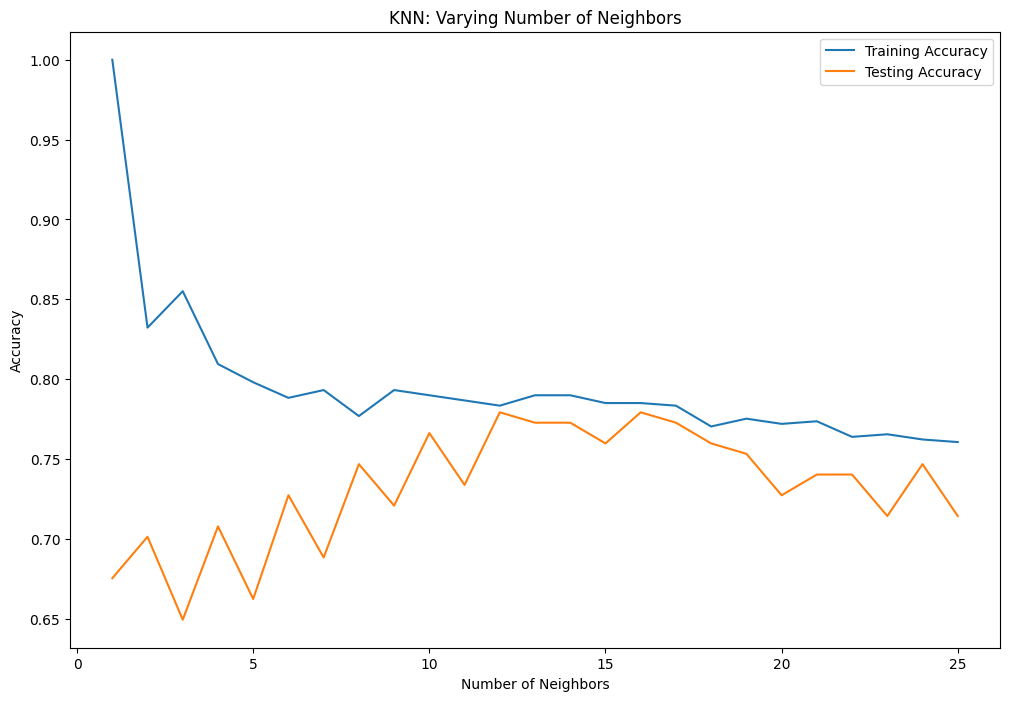

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Classification metrics

The classification metrics highly depends on the input (training/testing) dataset. The most frequently used metrics are as below,

### 1. Confusion metrics

![confusion matrix](./img/confusion_matrix.png)

### 2. Accuracy

accuracy = (TP + TN) / (TP + TN + FP + FN)

### 3. Precision

precision = TP / (TP + FP)

### 4. Recall

recall = TP / (TP + FN)

### 5. F1-score

f1-score = 2 * (precision * recall) / (precision + recall)

### 6. ROC AUC



In [19]:
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Confusion metrix: \n", confusion_matrix(y_test, y_pred))
print("\n Classification report: \n", classification_report(y_test, y_pred))

Confusion metrix: 
 [[89 10]
 [24 31]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



# Thank you!